<a href="https://colab.research.google.com/github/chain-veerender/datascience/blob/master/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification**

**Logistic regression:**

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). 

Like all regression analyses, logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Logistic Regression is another statistical analysis method borrowed by Machine Learning.

It is used when our dependent variable is dichotomous or binary. It just means a variable that has only 2 outputs, for example, A person will survive this accident or not, The student will pass this exam or not. The outcome can either be yes or no (2 outputs). 

This regression technique is similar to linear regression and can be used to predict the Probabilities for classification problems.

**Why do we use Logistic Regression rather than Linear Regression?**

It is only used when our dependent variable is binary and in linear regression this dependent variable is continuous.

The second problem is that if we add an outlier in our dataset, the best fit line in linear regression shifts to fit that point.

Now, if we use linear regression to find the best fit line which aims at minimizing the distance between the predicted value and actual value, the line will be like this:

![An image](https://miro.medium.com/max/700/1*Kdth3dTZRTeeg0QY3l1P_w.jpeg)

Image courtesy: https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102

Here the threshold value is 0.5, which means if the value of h(x) is greater than 0.5 then we predict malignant tumor (1) and if it is less than 0.5 then we predict benign tumor (0). Everything seems okay here but now let’s change it a bit, we add some outliers in our dataset, now this best fit line will shift to that point. Hence the line will be somewhat like this:

![An image](https://miro.medium.com/max/700/1*57QgHJNelV829yj4XoD8RQ.png)

Image courtesy: https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102

**Problem with thresholding linear regression:**

The blue line represents the old threshold and the yellow line represents the new threshold which is maybe 0.2 here. To keep our predictions right we had to lower our threshold value. Hence we can say that linear regression is prone to outliers. Now here if h(x) is greater than 0.2 then only this regression will give correct outputs.

Another problem with linear regression is that the predicted values may be out of range. We know that probability can be between 0 and 1, but if we use linear regression this probability may exceed 1 or go below 0.

**what is the solution?**

To overcome these problems we use Logistic Regression, which converts this straight best fit line in linear regression to an S-curve using the logistic or sigmoid function, which will always give values between 0 and 1.

**Logistic(Sigmoid) function:**

![An image](https://editor.analyticsvidhya.com/uploads/642295.png)

Instead of y we are taking probabilities (P). But there is an issue here, the value of (P) will exceed 1 or go below 0 and we know that range of Probability is (0-1). To overcome this issue we take “odds” of P:

![An image](https://editor.analyticsvidhya.com/uploads/827707.png)


**Logistic Regression Assumptions**

Binary logistic regression requires the dependent variable to be binary.

For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.

Only the meaningful variables should be included.

The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

The independent variables are linearly related to the log odds.

Logistic regression requires quite large sample sizes.

**Dataset**

Dataset is related to direct marketing campaigns (phone calls) of a Portuguese banking institution.

The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y). 

You can download the dataset [here](https://raw.githubusercontent.com/chain-veerender/datascience/master/portugese_banking.csv)

In [1]:
from google.colab import files
 
 
upload_data = files.upload()

Saving portugese_banking.csv to portugese_banking.csv


In [2]:
# import all libraries here

import pandas as pd
import numpy as np
import io

from sklearn import *
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.feature_selection import *
from sklearn.metrics import *


import statsmodels.api as sm

from imblearn.over_sampling import *

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
df = pd.read_csv(io.BytesIO(upload_data['portugese_banking.csv']))
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
df = df.dropna()
print(df.shape)
print(list(df.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [ ]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”

In [ ]:
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])
df['education']

0                      Basic
1                    unknown
2          university.degree
3                high.school
4                      Basic
                ...         
41183            high.school
41184                  Basic
41185      university.degree
41186    professional.course
41187            high.school
Name: education, Length: 41188, dtype: object

In [ ]:
df['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

Target variable class wise counts

In [ ]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

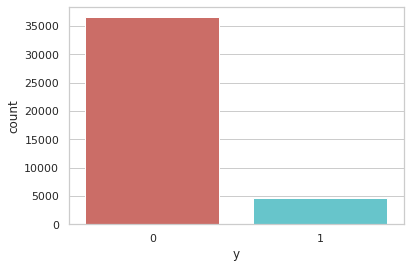

In [ ]:
sns.countplot(x='y',data=df,palette='hls')
plt.show()

**You can observe that data is highly imbalanced across classes**

In [ ]:
count_no_sub = len(df[df['y']==0])
count_sub = len(df[df['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


Classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11.

In [ ]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Interpretations:

The average age of customers who bought the term deposit is higher than that of the customers who didn’t.

The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.

Campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

In [ ]:
df.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [ ]:
df.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [ ]:
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


Capture relation of job title and purchasing tendency

Text(0, 0.5, 'Frequency of Purchase')

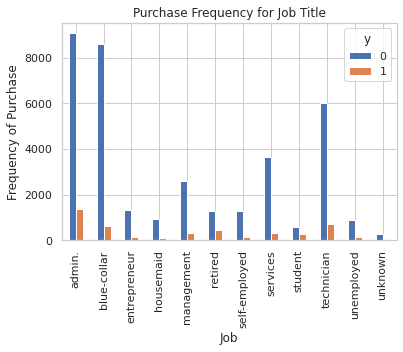

In [ ]:
%matplotlib inline
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

Text(0, 0.5, 'Proportion of Customers')

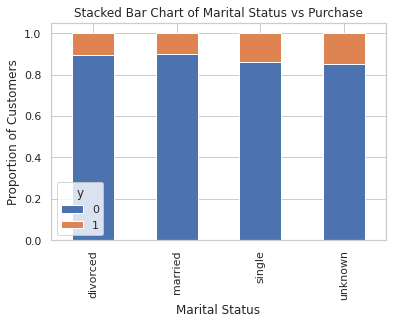

In [ ]:
table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Marital status does not seem a strong predictor for the outcome variable

Text(0, 0.5, 'Proportion of Customers')

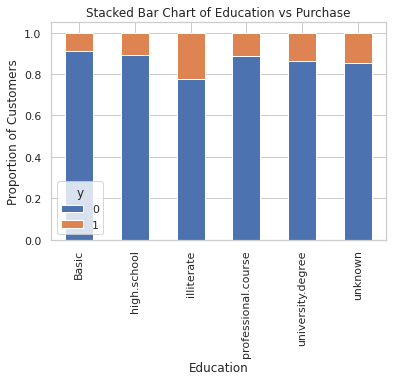

In [ ]:
table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Education is a good predictor of the outcome variable.

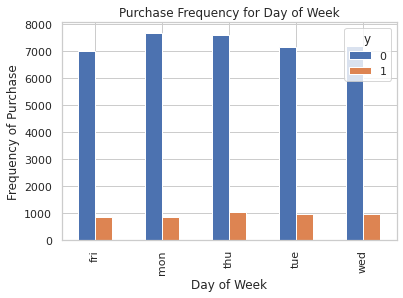

In [ ]:
pd.crosstab(df.day_of_week,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

Day of week is not a good predictor of the outcome.

Text(0, 0.5, 'Frequency of Purchase')

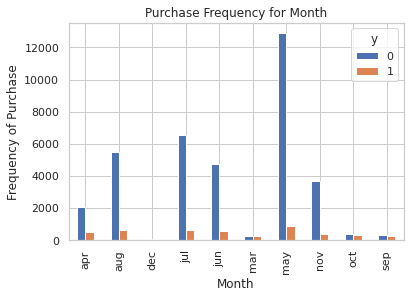

In [ ]:
pd.crosstab(df.month,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')


Month is a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency')

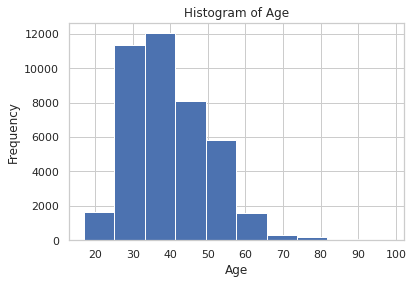

In [ ]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Most of the customers of the bank in this dataset are in the age range of 30–40.

Text(0, 0.5, 'Frequency of Purchase')

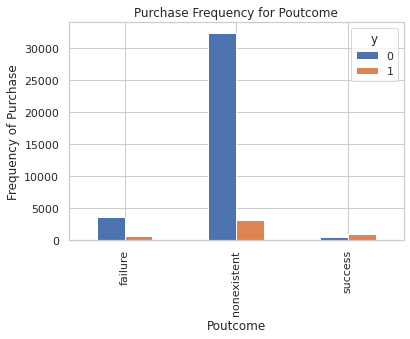

In [ ]:
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')

Poutcome seems to be a good predictor of the outcome variable.

**Create dummies from categorical variables**

Classification doesnot understand catgeorical variables or features. So,we are encoding categorical variables to dummy binary using one hot encoding

![An image](https://e6v4p8w2.rocketcdn.me/wp-content/uploads/2022/01/One-Hot-Encoding-for-Scikit-Learn-in-Python-Explained-1024x576.png)
Image courtesy: https://datagy.io/pandas-get-dummies/ 

Lets create all dummy variables from categorical columns and join to existing df. Later, we shall discard categorical columns and retain dummies for model building

In [4]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var                                 # notation for dummy category
    cat_list = pd.get_dummies(df[var], prefix=var)       # one hot encoding
    df1=df.join(cat_list)                              # adding dummy vars to existing df
    df=df1                                             # dummy + categorical columns

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
all_feat=df.columns.values.tolist()                         # list of all features
retained_feat=[i for i in all_feat if i not in cat_vars]    # reatined features with dummies in place of categorical features

In [5]:
df_final=df[retained_feat]
df_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

In [6]:
df_final.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


**Lets implement logistic regression on this data blindly**

In [8]:
X = df_final.loc[:, df_final.columns != 'y']
y = df_final.loc[:, df_final.columns == 'y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


**Stats Model**

In [9]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.209548
         Iterations: 35
                                         Results: Logit
Model:                          Logit                      Pseudo R-squared:           0.407     
Dependent Variable:             y                          AIC:                        12188.9827
Date:                           2022-09-11 15:19           BIC:                        12627.2506
No. Observations:               28831                      Log-Likelihood:             -6041.5   
Df Model:                       52                         LL-Null:                    -10182.   
Df Residuals:                   28778                      LLR p-value:                0.0000    
Converged:                      0.0000                     Scale:                      1.0000    
No. Iterations:                 35.0000                                                          
----------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


You can observe for lot of features P > 0.05 and data is also imbalanced across classes.

We can handle this in 2 steps:

1. Balance across classes

2. Dimensionality reduction in features

**1. Balance the classes**

**One Technique is SMOTE**

**Over-sampling using SMOTE**

With our training data created, we can up-sample the minoryt class of no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique)

At a high level, SMOTE:

1. Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.

2. Randomly choosing nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.



In [11]:
os = SMOTE(random_state=0)

columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


**2. Dimensionality reduction of features**

**Recursive Feature Elimination**

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

![An image](https://media-exp1.licdn.com/dms/image/C4E12AQF8c7_oUXF_Ug/article-inline_image-shrink_1000_1488/0/1590668357094?e=1667433600&v=beta&t=d0b5wpo9BQcLCoyQtt3__8JgOmrmKb2-OBRj3by3Z5k)

In [12]:
df_final_vars=df_final.columns.values.tolist()
y=['y']
X=[i for i in df_final_vars if i not in y]

logreg = LogisticRegression()                            # logistic from sklearn package
#RFE(estimator, n_features_to_select=5, step=1)                  
rfe = RFE(logreg)                           # RFE from sklearn package
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True  True  True False  True  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True False
  True False False False  True False False  True  True  True  True  True
  True  True False]
[25 29 23 30 24 20 21 28 18 26 12  5  7  6 11 32 10  9 19  8 14 13  1  1
  1  1  1  1  1  1 31  1  1  1  1  1 33  1  1  1  1  1  1  1  1  3  1 15
  1  4 27  2  1 17 16  1  1  1  1  1  1  1 22]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The RFE has helped us select the following features top 20: “euribor3m”, “job_blue-collar”, “job_housemaid”, “marital_unknown”, “education_illiterate”, “default_no”, “default_unknown”, “contact_cellular”, “contact_telephone”, “month_apr”, “month_aug”, “month_dec”, “month_jul”, “month_jun”, “month_mar”, “month_may”, “month_nov”, “month_oct”, “poutcome_failure”, “poutcome_success”.

In [13]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"]
       
X=os_data_X[cols]
y=os_data_y['y']

Implement Logistic

In [ ]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.455664
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.343     
Dependent Variable:   y                 AIC:               46639.8230
Date:                 2022-09-08 03:46  BIC:               46816.6671
No. Observations:     51134             Log-Likelihood:    -23300.   
Df Model:             19                LL-Null:           -35443.   
Df Residuals:         51114             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m             0.1612   0.0082  19.7747 0.0000  0.1452  0.1772
job_blue-collar 

In [ ]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()   # training on scikit learn package logistic 
logreg.fit(X_train_os, y_train_os)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred_os = logreg.predict(X_test_os)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_os, y_test_os)))

Accuracy of logistic regression classifier on test set: 0.87


**Metrics to measure performance of Classification Model**

**Confusion Matrix**

There is also fun 

![An image](https://miro.medium.com/max/462/1*7EYylA6XlXSGBCF77j_rOA.png)

In [ ]:
cm_logistic = confusion_matrix(y_test_os, y_pred_os)
print(cm_logistic)

[[7021  645]
 [1334 6341]]


![An image](https://miro.medium.com/max/300/1*QRIZDkk_FffXKs_07ZlhZw.png)

from all the classes we have predicted as positive, how many are actually positive.

![An image](https://miro.medium.com/max/300/1*BT3awaBdZHsit5s41LPb9A.png)

from all the positive classes, how many we predicted correctly.

**Accuracy**

From all the classes (positive and negative), how many of them we have predicted correctly.

![An image](https://wikimedia.org/api/rest_v1/media/math/render/svg/47deb47eb7ac214423d0a6afd05ec0af362fef9b)

![An image](https://miro.medium.com/max/358/1*98FaAKfPWo-EBTbjsxm4GA.png)

It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.

 F-score reaches its best value at 1 and worst score at 0.

The F-score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test

In [ ]:
print(classification_report(y_test_os, y_pred_os))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      7666
           1       0.91      0.83      0.87      7675

    accuracy                           0.87     15341
   macro avg       0.87      0.87      0.87     15341
weighted avg       0.87      0.87      0.87     15341



Interpretation: 

Of the entire test set, 91% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 83% of the customer’s preferred term deposits that were promoted.

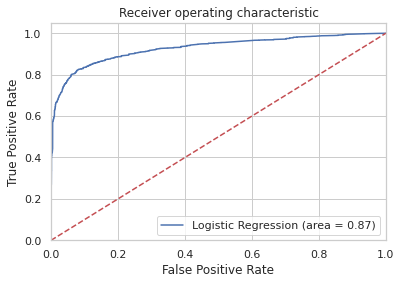

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

![An image](https://wikimedia.org/api/rest_v1/media/math/render/svg/c5119dc2a74e72317ac2274c5b0d4d562597d8af)

![An image](https://wikimedia.org/api/rest_v1/media/math/render/svg/f02ea353bf60bfdd9557d2c98fe18c34cd8db835)



The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

**How to handle real world imbalanced datasets when there is no choice of oversampling or undersampling ?**

**Lets relook into our original imbalanced data before oversampling minority classes using SMOTE**

**Lets pick data with dimensionality reduction of features on this imbalanced data and observe ROC curve** 

In [14]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"]
       
X_imbalance=X_train[cols]
y_imbalance=y_train['y']

In [15]:
logreg_imbal = LogisticRegression()   # training on scikit learn package logistic 
logreg_imbal.fit(X_imbalance, y_imbalance)

LogisticRegression()

In [18]:
X_test_imbalance = X_test[cols]
y_test_imbalance = y_test['y']
y_pred_imbalance = logreg_imbal.predict(X_test_imbalance)
print('Accuracy of logistic regression classifier on imbalanced test set: {:.2f}'.format(logreg_imbal.score(X_test_imbalance, y_test_imbalance)))

Accuracy of logistic regression classifier on imbalanced test set: 0.90


Ohh Good! But dont jump into conclusions that this model is better. Lets diagnonize with other metrics

In [19]:
cm_logistic_imbal = confusion_matrix(y_test_imbalance, y_pred_imbalance)
print(cm_logistic_imbal)

[[10880   101]
 [ 1125   251]]


In [20]:
print(classification_report(y_test_imbalance, y_pred_imbalance))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.71      0.18      0.29      1376

    accuracy                           0.90     12357
   macro avg       0.81      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



**Observe that, Precision and recall are deviating too much for class 1 due to bias on fixed set threshold on sigmoid/logistic of "Probalability = 0.5" for this imbalanced set.**

**From Real world business scenario, oversampling of data is not allowed to balance this data**

**Hence, we need to tune the threshold to optimal value for best fit of classification model for imbalanced datasets**

**Optimal Threshold Tuning using:**

1. ROC curve

2. Precision-Recall Curve

3. Cost Function

4. Accuracy

**1. Threshold Tuning using ROC**

**1.A G-mean**

The geometric mean (G-mean) is the root of the product of class-wise sensitivity. 

This measure tries to maximize the accuracy on each of the classes while keeping these accuracies balanced. 

For binary classification G-mean is the squared root of the product of the sensitivity and specificity. 

For multi-class problems it is a higher root of the product of sensitivity for each class.

![An image](https://miro.medium.com/max/700/1*X7hbU7MbRbtd-mHsmk-D2g.png)

Credentials: https://towardsdatascience.com/optimal-threshold-for-imbalanced-classification-5884e870c293



**We need to choose corresponding Threshold which is at index where G-Mean is maximum**

Identify the threshold

Best Threshold=0.129342, G-Mean=0.738


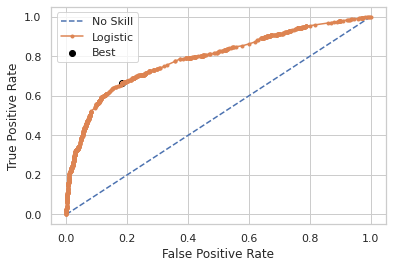

In [21]:
# predict probabilities
yhat = logreg_imbal.predict_proba(X_test_imbalance)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test_imbalance, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Tune the threshold

In [67]:
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold

    def threshold_from_optimal_g_mean(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores) 
        gmeans = np.sqrt(tpr * (1-fpr))
        optimal_idx = np.argmax(gmeans)

        return thresholds[optimal_idx], gmeans[optimal_idx]

    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores) 

        optimal_idx = np.argmax(tpr - fpr)

        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]

    def threshold_from_desired_precision(self, X, y, desired_precision=0.9):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        desired_precision_idx = np.argmax(precisions >= desired_precision)
        
        return thresholds[desired_precision_idx], recalls[desired_precision_idx]

    def threshold_from_desired_recall(self, X, y, desired_recall=0.9):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        desired_recall_idx = np.argmin(recalls >= desired_recall)
        
        return thresholds[desired_recall_idx], precisions[desired_recall_idx]

    def threshold_from_optimal_f_score(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        fscores = (2 * precisions * recalls) / (precisions + recalls)
        
        optimal_idx = np.argmax(fscores)
        
        return thresholds[optimal_idx], fscores[optimal_idx]

    def default_cost_function(tn, fp, fn, tp):
      cost = 0
    
      cost += (tn * -10000) 
      cost += (fp * 1000) 
      cost += (fn * 1500) 
      cost += (tp * -20000) 
    
      return cost

    def threshold_from_cost_function(self, X, y, cost_function):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        costs = []
        tns = []
        fps = []
        fns = []
        tps = []
        
        for threshold in thresholds:
            y_pred_with_threshold = (y_scores >= threshold).astype(int)
            tn, fp, fn, tp = confusion_matrix(y, y_pred_with_threshold).ravel()
            costs.append(cost_function(tn, fp, fn, tp))
            tns.append(tn), fps.append(fp), fns.append(fn), tps.append(tp)

        df_cost = pd.DataFrame({'precision':precisions[:-1], 'recall':recalls[:-1], 'threshold':thresholds, 'cost':costs, 'tn':tns, 'fp':fps, 'fn':fns, 'tp':tps})
        
        min_cost = df_cost['cost'].min()
        threshold = df_cost[df_cost['cost']==min_cost].iloc[0]['threshold']

        return threshold, min_cost, df_cost

    def threshold_from_optimal_accuracy(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
        
        accuracies = []
        tns = []
        fps = []
        fns = []
        tps = []

        for threshold in thresholds:
            y_pred_with_threshold = (y_scores >= threshold).astype(int)
            tn, fp, fn, tp = confusion_matrix(y, y_pred_with_threshold).ravel()

            accuracies.append((tp+tn)/(tn+fp+fn+tp))
            tns.append(tn), fps.append(fp), fns.append(fn), tps.append(tp)
        
        df_accuracy = pd.DataFrame({'threshold':thresholds, 'accuracy':accuracies, 'tn':tns, 'fp':fps, 'fn':fns, 'tp':tps})

        max_accuracy = df_accuracy['accuracy'].max()
        threshold = df_accuracy[df_accuracy['accuracy']==max_accuracy].iloc[0]['threshold']

        return threshold, max_accuracy, df_accuracy

Code idea credits (Above cell): 

https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7e

**Using Gmean**

In [68]:
lrt = LogisticRegressionWithThreshold()
lrt.fit(X_imbalance, y_imbalance)
 
threshold_gmean, gmean_optimalidx = lrt.threshold_from_optimal_g_mean(X_imbalance, y_imbalance)

# Predictions on test data
y_pred_gmean = lrt.predict(X_test_imbalance, threshold_gmean)

threshold_gmean, gmean_optimalidx

(0.1289635683092242, 0.7285981086812349)

Confusion Matrix

In [38]:
cm_logistic_gmean = confusion_matrix(y_test_imbalance, y_pred_gmean)
print(cm_logistic_gmean)

[[8962 2019]
 [ 459  917]]


In [39]:
print(classification_report(y_test_imbalance, y_pred_gmean))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     10981
           1       0.31      0.67      0.43      1376

    accuracy                           0.80     12357
   macro avg       0.63      0.74      0.65     12357
weighted avg       0.88      0.80      0.83     12357



**Gmean improved Recall for class 1 but precision of class 1 is penalized. So, this is not right tuning parameter to set threshold here**

**1.B Using TPR - FPR**

In [40]:
threshold_tpr_minus_fpr, tpr_minus_fpr_optimalidx = lrt.threshold_from_optimal_tpr_minus_fpr(X_imbalance, y_imbalance)

# Predictions on test data
y_pred_tpr_minus_fpr = lrt.predict(X_test_imbalance, threshold_tpr_minus_fpr)

threshold_tpr_minus_fpr, tpr_minus_fpr_optimalidx

(0.1622964921550243, 0.47261083096163325)

Confusion Matrix

In [41]:
cm_logistic_tpr_minus_fpr = confusion_matrix(y_test_imbalance, y_pred_tpr_minus_fpr)
print(cm_logistic_tpr_minus_fpr)

[[9669 1312]
 [ 554  822]]


In [42]:
print(classification_report(y_test_imbalance, y_pred_tpr_minus_fpr))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     10981
           1       0.39      0.60      0.47      1376

    accuracy                           0.85     12357
   macro avg       0.67      0.74      0.69     12357
weighted avg       0.88      0.85      0.86     12357



**Still not optimal tuning with TPR - FPR as parameter**

**2. Threshold tuning using precision recall curve**

Lets plot precision recall curve and interpret trade off on this

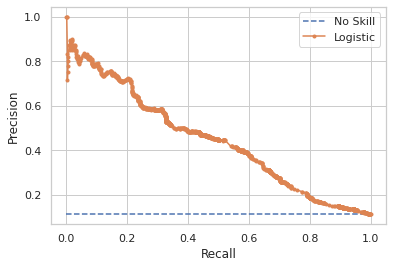

In [35]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test_imbalance, yhat)
# plot the pr-curve curve for the model
no_skill = len(y_test_imbalance[y_test_imbalance==1]) / len(y_test_imbalance)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

**2.A Using desired Precision or Recall reference**

From PR-Curve it is desirable that by setting Recall = 0.5 approx we can get best threshold

In [57]:
threshold_recall, precision_recall = lrt.threshold_from_desired_recall(X_imbalance, y_imbalance, 0.5)
y_pred_recall = lrt.predict(X_test_imbalance, threshold_recall)

threshold_recall, precision_recall

(0.22108533036714187, 0.44393032117583014)

Confusion matrix

In [58]:
cm_logistic_recall = confusion_matrix(y_test_imbalance, y_pred_recall)
print(cm_logistic_recall)

[[10126   855]
 [  686   690]]


In [59]:
print(classification_report(y_test_imbalance, y_pred_recall))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10981
           1       0.45      0.50      0.47      1376

    accuracy                           0.88     12357
   macro avg       0.69      0.71      0.70     12357
weighted avg       0.88      0.88      0.88     12357



Similar analysis can be done by setting Precision and observing recall

In [61]:
threshold_precision, recall_precision = lrt.threshold_from_desired_precision(X_imbalance, y_imbalance, 0.45)
y_pred_precision = lrt.predict(X_test_imbalance, threshold_precision)

threshold_precision, recall_precision

(0.24956945698779917, 0.4794730392156863)

Confusion matrix

In [62]:
cm_logistic_precision = confusion_matrix(y_test_imbalance, y_pred_precision)
print(cm_logistic_precision)

[[10190   791]
 [  718   658]]


In [63]:
print(classification_report(y_test_imbalance, y_pred_precision))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10981
           1       0.45      0.48      0.47      1376

    accuracy                           0.88     12357
   macro avg       0.69      0.70      0.70     12357
weighted avg       0.88      0.88      0.88     12357



**2.B Using optimal f1-score**

In [64]:
threshold_f1, optimal_f1_score = lrt.threshold_from_optimal_f_score(X_imbalance, y_imbalance)
y_pred_f1 = lrt.predict(X_test_imbalance, threshold_f1)

threshold_f1, optimal_f1_score

(0.21749293615234583, 0.47907891041842177)

Confusion matrix

In [65]:
cm_logistic_f1 = confusion_matrix(y_test_imbalance, y_pred_f1)
print(cm_logistic_f1)

[[10085   896]
 [  660   716]]


In [66]:
print(classification_report(y_test_imbalance, y_pred_f1))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10981
           1       0.44      0.52      0.48      1376

    accuracy                           0.87     12357
   macro avg       0.69      0.72      0.70     12357
weighted avg       0.88      0.87      0.88     12357



**3. Threshold Tuning using cost function**

In [74]:
def default_cost_function(tn, fp, fn, tp):
      cost = 0
    
      cost += (tn * -10000) 
      cost += (fp * 1000) 
      cost += (fn * 1500) 
      cost += (tp * -20000) 
    
      return cost

threshold_cost, min_cost, df_cost = lrt.threshold_from_cost_function(X_imbalance, y_imbalance, default_cost_function)
y_pred_cost = lrt.predict(X_test_imbalance, threshold_cost)

threshold_cost, min_cost

(0.2198199735689419, -263850500)

Confusion matrix

In [75]:
cm_logistic_cost = confusion_matrix(y_test_imbalance, y_pred_cost)
print(cm_logistic_cost)

[[10093   888]
 [  666   710]]


In [76]:
print(classification_report(y_test_imbalance, y_pred_cost))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10981
           1       0.44      0.52      0.48      1376

    accuracy                           0.87     12357
   macro avg       0.69      0.72      0.70     12357
weighted avg       0.88      0.87      0.88     12357



In [77]:
df_cost.head()

,precision,recall,threshold,cost,tn,fp,fn,tp
0,0.113211,1.000000,0.013179,-39713000,0,25567,0,3264
1,0.113241,0.999081,0.013206,-39989500,31,25536,3,3261
2,0.113463,0.998468,0.013212,-40738500,103,25464,5,3259
3,0.113514,0.996936,0.013219,-41203000,155,25412,10,3254
4,0.113717,0.996630,0.013225,-41830500,214,25353,11,3253


**4. Threshold tuning using accuracy**

In [79]:
threshold_acc, max_accuracy, df_accuracy = lrt.threshold_from_optimal_accuracy(X_imbalance, y_imbalance)

# Predict on test data
y_pred_acc = lrt.predict(X_test_imbalance, threshold_acc)

threshold_acc, max_accuracy

(0.48082508199310114, 0.8981651694356769)

Confusion Matrix

In [80]:
cm_logistic_acc = confusion_matrix(y_test_imbalance, y_pred_acc)
print(cm_logistic_acc)

[[10874   107]
 [ 1101   275]]


In [81]:
print(classification_report(y_test_imbalance, y_pred_acc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.72      0.20      0.31      1376

    accuracy                           0.90     12357
   macro avg       0.81      0.60      0.63     12357
weighted avg       0.89      0.90      0.88     12357



Not convincing compared to Precison Recall curve tuning

**Conclusion: For imbalanced data with huge difference or big ratio, threshold tuning using precision-recall curve is the best choice**